In [3]:
def assert_equals(solution, ans, *args):
    assert solution == ans, f"{solution} should equal {ans}"

# Is a number prime?

Define a function that takes an integer argument and returns a logical value true or false depending on if the integer is a prime.

Per Wikipedia, a prime number ( or a prime ) is a natural number greater than 1 that has no positive divisors other than 1 and itself.

Requirements
- You can assume you will be given an integer input.
- You can not assume that the integer will be only positive. You may be given negative numbers as well ( or 0 ).
- NOTE on performance: There are no fancy optimizations required, but still the most trivial solutions might time out. Numbers go up to 2^31 ( or similar, depending on language ). Looping all the way up to n, or n/2, will be too slow.

Example

is_prime(1)  /* false */

is_prime(2)  /* true  */

is_prime(-1) /* false */


In [18]:
def is_prime(num):

  if num <= 1:
    return False

  for i in range(2, int(num**.5) + 1):
    if num % i == 0:
      return False
    
  return True

assert_equals(is_prime(0),  False, "0  is not prime")
assert_equals(is_prime(1),  False, "1  is not prime")
assert_equals(is_prime(2),  True, "2  is prime")
assert_equals(is_prime(73), True, "73 is prime")
assert_equals(is_prime(75), False, "75 is not prime")
assert_equals(is_prime(-1), False, "-1 is not prime")

assert_equals(is_prime(3),  True, "3  is prime");
assert_equals(is_prime(5),  True, "5  is prime");
assert_equals(is_prime(7),  True, "7  is prime");
assert_equals(is_prime(41), True, "41 is prime");
assert_equals(is_prime(5099), True, "5099 is prime");

assert_equals(is_prime(4),  False, "4  is not prime");
assert_equals(is_prime(6),  False, "6  is not prime");
assert_equals(is_prime(8),  False, "8  is not prime");
assert_equals(is_prime(9), False, "9 is not prime");
assert_equals(is_prime(45), False, "45 is not prime");
assert_equals(is_prime(-5), False, "-5 is not prime");
assert_equals(is_prime(-8), False, "-8 is not prime");
assert_equals(is_prime(-41), False, "-41 is not prime");

# [Mean without outliers](https://www.codewars.com/kata/5962d557be3f8bb0ca000010/train/python)

The mean and standard deviation of a sample of data can be thrown off if the sample contains one or many outlier(s) :


For this reason, it is usually a good idea to check for and remove outliers before computing the mean or the standard deviation of a sample. To this aim, your function will receive a list of numbers representing a sample of data. Your function must remove any outliers and return the mean of the sample, rounded to two decimal places (round only at the end).

Since there is no objective definition of "outlier" in statistics, your function will also receive a cutoff, in standard deviation units. So for example if the cutoff is 3, then any value that is more than 3 standard deviations above or below the mean must be removed. Notice that, once outlying values are removed in a first "sweep", other less extreme values may then "become" outliers, that you'll have to remove as well!

Example :

sample = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]

cutoff = 3

clean_mean(sample, cutoff) → 5.5

In [39]:
from scipy.stats import zscore
import numpy as np

def find_outliers(sample, cutoff):
    return np.abs(zscore(sample)) > cutoff


def clean_mean(sample, cutoff):

    sample = np.array(sample)
    
    while np.any(outliers := find_outliers(sample, cutoff)):

        sample = sample[np.logical_not(outliers)]

    return round(np.mean(sample), 2)


sample = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
cutoff = 3
assert_equals(clean_mean(sample, cutoff), 5.5)

# Max From Common DataFrames


Input parameters

Two pandas.DataFrame objects

Task
Your function must return a new pandas.DataFrame with the same data and columns from the first parameter. For common columns in both inputs you must return the greater value of each cell for that column.

You must not modify the original inputs.

Input DataFrame will never be empty. The number rows of both inputs will be the same.

Examples

```
Inputs
   A    B    C
0  2.5  2.0  2.0
1  2.0  2.0  2.0
   C    B    D    E
0  1.0  6.0  7.0  1.0
1  8.5  1.0  9.0  1.0
Output
   A    B    C
0  2.5  6.0  2.0
1  2.0  2.0  8.5
```


In [29]:
import pandas as pd

def max_common(df_a, df_b): 
    return df_a.mask(df_a.lt(df_b), df_b)


df_a = pd.DataFrame(data=[[2.5, 2.0, 2.0], [2.0, 2.0, 2.0]], columns=list('ABC'))
df_b = pd.DataFrame(data=[[1.0, 6.0, 7.0, 1.0], [8.5, 1.0, 9.0, 1.0]], columns=list('CBDE'))
df_out = pd.DataFrame(data=[[2.5, 6.0, 2.0], [2.0, 2.0, 8.5]], columns=list('ABC'))
assert (max_common(df_a, df_b).equals(df_out))

# Variance in a array of words


Consider X as the aleatory variable that count the number of letters in a word. Write a function that, give in input an array of words (strings), calculate the variance of X. Max decimal of the variance : 4.

Some wiki: Variance , Aleatory variable

Example:

Consider "Hello" and "World":

X is { 5 } with P(X = 5) = 1 because the two words have the same length.
So E[X] = 5 x 1 = 5 and the standard formula for variance is E[(X - u)^2] so 1 x (5-5)^2 = 0 or you can calculate with the other formula E[X^2] - E[X]^2 = 5^2 x 1 - 5^2 = 0

In [17]:
from statistics import pvariance

def variance(words):

    return round(pvariance(list(map(len, words))), 4)

assert_equals(variance("Hello world".split()), 0)
assert_equals(variance("Hi world".split()), 2.25)

# Clocky Mc Clock-Face


Due to lack of maintenance the minute-hand has fallen off Town Hall clock face.

And because the local council has lost most of our tax money to a Nigerian email scam there are no funds to fix the clock properly.

Instead, they are asking for volunteer programmers to write some code that tell the time by only looking at the remaining hour-hand!

What a bunch of cheapskates!

Can you do it?

Kata
Given the angle (in degrees) of the hour-hand, return the time in 12 hour HH:MM format. Round down to the nearest minute.

Examples

12:00 = 0 degrees

03:00 = 90 degrees

06:00 = 180 degrees

09:00 = 270 degrees

12:00 = 360 degrees

Notes
0 <= angle <= 360

Do not make any AM or PM assumptions for the HH:MM result. They are indistinguishable for this Kata.

3 o'clock is 03:00, not 15:00
7 minutes past midnight is 12:07
7 minutes past noon is also 12:07

In [11]:
def what_time_is_it(angle):
    hour = angle // 30
    minute = (angle - hour * 30) * 2

    if hour == 0:
        hour = 12

    return f"{int(hour):02}:{int(minute):02}"


assert_equals(what_time_is_it(0), '12:00')
assert_equals(what_time_is_it(360), '12:00')
assert_equals(what_time_is_it(90), '03:00')
assert_equals(what_time_is_it(180), '06:00')
assert_equals(what_time_is_it(270), '09:00')
assert_equals(what_time_is_it(30), '01:00')

# [Triangle type](https://www.codewars.com/kata/53907ac3cd51b69f790006c5/train/python)


In this kata, you should calculate type of triangle with three given sides a, b and c (given in any order).

If all angles are less than 90°, this triangle is acute and function should return 1.

If one angle is strictly 90°, this triangle is right and function should return 2.

If one angle more than 90°, this triangle is obtuse and function should return 3.

If three sides cannot form triangle, or one angle is 180° (which turns triangle into segment) - function should return 0.

Input parameters are sides of given triangle. All input values are non-negative floating point or integer numbers (or both).


Acute

Right

Obtuse

Examples:
```
(2, 4, 6) ---> return 0 (Not triangle)
(8, 5, 7) ---> return 1 (Acute, angles are approx. 82°, 38° and 60°)
(3, 4, 5) ---> return 2 (Right, angles are approx. 37°, 53° and exactly 90°)
(7, 12, 8) ---> return 3 (Obtuse, angles are approx. 34°, 106° and 40°)
```

If you stuck, this can help you: http://en.wikipedia.org/wiki/Law_of_cosines. But you can solve this kata even without angle calculation.

There is very small chance of random test to fail due to round-off error, in such case resubmit your solution.

In [2]:
def triangle_type(a, b, c):

    a, b, c = sorted([a, b, c])

    if a + b <= c:
        return 0
    elif a**2 + b**2 > c**2:
        return 1
    elif a**2 + b**2 == c**2:
        return 2
    else:
        return 3


def do_test(sides, expected):
    type = ["INVALID", "ACUTE", "RIGHT", "OBTUSE"][expected]
    msg = "Sides = ({}, {}, {}), type = {}".format(*sides, type)
    actual = triangle_type(sides[0], sides[1], sides[2])
    assert_equals(actual, expected, msg)


do_test([7, 3, 2], 0) # Not triangle
do_test([2, 4, 6], 0) # Not triangle
do_test([8, 5, 7], 1) # Acute
do_test([3, 4, 5], 2) # Right
do_test([7, 12, 8], 3) # Obtuse

# [Character with longest consecutive repetition](https://www.codewars.com/kata/586d6cefbcc21eed7a001155/python)

For a given string s find the character c (or C) with longest consecutive repetition and return:

(c, l)

where l (or L) is the length of the repetition. If there are two or more characters with the same l return the first in order of appearance.

For empty string return:

('', 0)

In [2]:
%%timeit

from itertools import groupby

# clever
def longest_repetition(chars):

    return max([(k, len(list(g))) for k, g in groupby(chars)], 
               key=lambda x: (x[1]), 
               default=('', 0))

tests = [
    # [input, expected],
    ["aaaabb", ('a', 4)],
    ["bbbaaabaaaa", ('a', 4)],
    ["cbdeuuu900", ('u', 3)],
    ["abbbbb", ('b', 5)],
    ["aabb", ('a', 2)],
    ["ba", ('b', 1)],
    ["", ('', 0)],
]

for inp, exp in tests:
    assert_equals(longest_repetition(inp), exp)

19 µs ± 126 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [4]:
%%timeit

# faster
def longest_repetition(chars):
    max_char, max_count = '', 0
    char, count = '', 0
    for c in chars:
        if c != char:
            count, char = 0, c
        count += 1
        if count > max_count:
            max_char, max_count = char, count
    return max_char, max_count

tests = [
    # [input, expected],
    ["aaaabb", ('a', 4)],
    ["bbbaaabaaaa", ('a', 4)],
    ["cbdeuuu900", ('u', 3)],
    ["abbbbb", ('b', 5)],
    ["aabb", ('a', 2)],
    ["ba", ('b', 1)],
    ["", ('', 0)],
]

for inp, exp in tests:
    assert_equals(longest_repetition(inp), exp)

6.22 µs ± 112 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Newton's Square Root

In [ ]:
def newtons_sqrt(n, tolerance):
 
    # Assuming the sqrt of n as n only
    previous_estimate = n
    new_estimate = 1

    while abs(new_estimate - previous_estimate) > tolerance:

        previous_estimate = new_estimate

        # Calculate more close x
        new_estimate = (previous_estimate + n / previous_estimate) / 2
        print(new_estimate)
        
    return new_estimate


newtons_sqrt(.24, .00001)

0.62
0.5035483870967742
0.49008296997375544
0.4898979834822777
0.4898979485566368


0.4898979485566368

# If you can read this...


You'll have to translate a string to Pilot's alphabet (NATO phonetic alphabet).

Input:

If, you can read?

Output:

India Foxtrot , Yankee Oscar Uniform Charlie Alfa November Romeo Echo Alfa Delta ?

Note:

- There are preloaded dictionary you can use, named NATO

- The set of used punctuation is ,.!?.

- Punctuation should be kept in your return string, but spaces should not.

- Xray should not have a dash within.

- Every word and punctuation mark should be seperated by a space ' '.

- There should be no trailing whitespace

In [ ]:
NATO = {'A': 'Alfa', 'B': 'Bravo', 'C': 'Charlie', 'D': 'Delta', 'E': 'Echo', 'F': 'Foxtrot', 'G': 'Golf', 'H': 'Hotel', 'I': 'India', 'J': 'Juliett', 'K': 'Kilo', 'L': 'Lima', 'M': 'Mike', 'N': 'November', 'O': 'Oscar', 'P': 'Papa', 'Q': 'Quebec', 'R': 'Romeo', 'S': 'Sierra', 'T': 'Tango', 'U': 'Uniform', 'V': 'Victor', 'W': 'Whiskey', 'X': 'Xray', 'Y': 'Yankee', 'Z': 'Zulu'}

def to_nato(words):
    return " ".join(NATO.get(c, c) for c in words.upper() if not c.isspace())

assert_equals(to_nato('If you can read'), "India Foxtrot Yankee Oscar Uniform Charlie Alfa November Romeo Echo Alfa Delta")
assert_equals(to_nato('Did not see that coming'), "Delta India Delta November Oscar Tango Sierra Echo Echo Tango Hotel Alfa Tango Charlie Oscar Mike India November Golf")
assert_equals(to_nato('.d?d!'),'. Delta ? Delta !')

# Multi-tap Keypad Text Entry on an Old Mobile Phone

Prior to having fancy iPhones, teenagers would wear out their thumbs sending SMS messages on candybar-shaped feature phones with 3x4 numeric keypads.
```
------- ------- -------
|     | | ABC | | DEF |
|  1  | |  2  | |  3  |
------- ------- -------
------- ------- -------
| GHI | | JKL | | MNO |
|  4  | |  5  | |  6  |
------- ------- -------
------- ------- -------
|PQRS | | TUV | | WXYZ|
|  7  | |  8  | |  9  |
------- ------- -------
------- ------- -------
|     | |space| |     |
|  *  | |  0  | |  #  |
------- ------- -------
```

Prior to the development of T9 (predictive text entry) systems, the method to type words was called "multi-tap" and involved pressing a button repeatedly to cycle through the possible values.

For example, to type a letter "R" you would press the 7 key three times (as the screen display for the current character cycles through P->Q->R->S->7). A character is "locked in" once the user presses a different key or pauses for a short period of time (thus, no extra button presses are required beyond what is needed for each letter individually). The zero key handles spaces, with one press of the key producing a space and two presses producing a zero.

In order to send the message "WHERE DO U WANT 2 MEET L8R" a teen would have to actually do 47 button presses. No wonder they abbreviated.

For this assignment, write a module that can calculate the amount of button presses required for any phrase. Punctuation can be ignored for this exercise. Likewise, you can assume the phone doesn't distinguish between upper/lowercase characters (but you should allow your module to accept input in either for convenience).

Hint: While it wouldn't take too long to hard code the amount of keypresses for all 26 letters by hand, try to avoid doing so! (Imagine you work at a phone manufacturer who might be testing out different keyboard layouts, and you want to be able to test new ones rapidly.)

In [ ]:
from string import ascii_lowercase

def presses(phrase, letter_bins=(0, 3, 3, 3, 3, 3, 4, 3, 4, 1)):
    
    letters = list(ascii_lowercase) + [" "]
    letter_taps = [t for b in letter_bins for t in range(1, b + 1)]
    letter_mapping = dict(zip(letters, letter_taps))
    
    numbers = list(map(str, range(1, 10))) + ["0"]
    number_mapping = {n: t + 1 for n, t in zip(numbers, letter_bins)}

    mapping = {**letter_mapping, **number_mapping}

    total_taps = 0

    for c in phrase.lower():
        total_taps += mapping.get(c, 1)

    return total_taps


assert_equals(presses("LOL"), 9)
assert_equals(presses("HOW R U"), 13)
assert_equals(presses("WHERE DO U WANT 2 MEET L8R"), 47)

[Dashatize it](https://www.codewars.com/kata/58223370aef9fc03fd000071)

Given a variable n,

If n is an integer, Return a string with dash'-'marks before and after each odd integer, but do not begin or end the string with a dash mark. If n is negative, then the negative sign should be removed.

If n is not an integer, return the string "None".

Ex:

dashatize(274) -> '2-7-4'

dashatize(6815) -> '68-1-5'

In [ ]:
%%timeit

import re

def dashatize(n):
    if isinstance(n, int):
        n = re.sub(r"([13579])", r"-\1-", str(abs(n)))
        n = n.replace("--", "-").strip("-")
        return n
    return "None"

assert_equals(dashatize(274),"2-7-4", "Should return 2-7-4")
assert_equals(dashatize(5311),"5-3-1-1", "Should return 5-3-1-1")
assert_equals(dashatize(86320),"86-3-20", "Should return 86-3-20")
assert_equals(dashatize(974302),"9-7-4-3-02", "Should return 9-7-4-3-02")

24.8 µs ± 3.04 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [ ]:
%%timeit

def dashatize(n):
    if isinstance(n, int):
        return '-'.join(w for w in re.split(r'([13579])', str(abs(n))) if len(w) > 0)
    return "None"

assert_equals(dashatize(274),"2-7-4", "Should return 2-7-4")
assert_equals(dashatize(5311),"5-3-1-1", "Should return 5-3-1-1")
assert_equals(dashatize(86320),"86-3-20", "Should return 86-3-20")
assert_equals(dashatize(974302),"9-7-4-3-02", "Should return 9-7-4-3-02")

11.3 µs ± 70.5 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# [Reverse every other word in the string](https://www.codewars.com/kata/58d76854024c72c3e20000de/train/python)


Reverse every other word in a given string, then return the string. Throw away any leading or trailing whitespace, while ensuring there is exactly one space between each word. Punctuation marks should be treated as if they are a part of the word in this kata.

In [ ]:
%%timeit

def reverse_alternate(s):

    return " ".join([w[::-1] if i % 2 else w for i, w in enumerate(s.split())])

assert_equals(reverse_alternate("Did it work?"), "Did ti work?")
assert_equals(reverse_alternate("I really hope it works this time..."), "I yllaer hope ti works siht time...")
assert_equals(reverse_alternate("Reverse this string, please!"), "Reverse siht string, !esaelp")
assert_equals(reverse_alternate("Have a beer"), "Have a beer")
assert_equals(reverse_alternate("   "), "")
assert_equals(reverse_alternate("This is not a test "), "This si not a test")
assert_equals(reverse_alternate("This       is a  test "), "This si a tset")

10.2 µs ± 378 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%%timeit

def reverse_alternate(s):
  words = s.split()
  words[1::2] = [word[::-1] for word in words[1::2]]
  return ' '.join(words)

assert_equals(reverse_alternate("Did it work?"), "Did ti work?")
assert_equals(reverse_alternate("I really hope it works this time..."), "I yllaer hope ti works siht time...")
assert_equals(reverse_alternate("Reverse this string, please!"), "Reverse siht string, !esaelp")
assert_equals(reverse_alternate("Have a beer"), "Have a beer")
assert_equals(reverse_alternate("   "), "")
assert_equals(reverse_alternate("This is not a test "), "This si not a test")
assert_equals(reverse_alternate("This       is a  test "), "This si a tset")

8.95 µs ± 114 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# [Highest Rank Number in an Array](https://www.codewars.com/kata/5420fc9bb5b2c7fd57000004/train/python)

Complete the method which returns the number which is most frequent in the given input array. If there is a tie for most frequent number, return the largest number among them.

Note: no empty arrays will be given.

Examples

[12, 10, 8, 12, 7, 6, 4, 10, 12]              -->  12

[12, 10, 8, 12, 7, 6, 4, 10, 12, 10]          -->  12

[12, 10, 8, 8, 3, 3, 3, 3, 2, 4, 10, 12, 10]  -->  3

In [ ]:
%%timeit

from collections import Counter

def highest_rank(arr):
    # your code here
    counts = Counter(arr)

    max_count = max(counts.values())
    
    return max([k for k, v in counts.items() if v == max_count])
    

assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 12]), 12)
assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 10]), 10)

7.68 µs ± 123 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%%timeit

def highest_rank(arr):
    return sorted(arr, key=lambda x: (arr.count(x), x))[-1]

assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 12]), 12)
assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 10]), 10)

7.02 µs ± 102 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


In [ ]:
%%timeit

def highest_rank(arr):
    return max(sorted(arr, reverse=True), key=arr.count)

assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 12]), 12)
assert_equals(highest_rank([12, 10, 8, 12, 7, 6, 4, 10, 10]), 10)


4.73 µs ± 99 ns per loop (mean ± std. dev. of 7 runs, 100,000 loops each)


# Roman Numerals Decoder

DESCRIPTION:

Create a function that takes a Roman numeral as its argument and returns its value as a numeric decimal integer. You don't need to validate the form of the Roman numeral.

Modern Roman numerals are written by expressing each decimal digit of the number to be encoded separately, starting with the leftmost digit and skipping any 0s. So 1990 is rendered "MCMXC" (1000 = M, 900 = CM, 90 = XC) and 2008 is rendered "MMVIII" (2000 = MM, 8 = VIII). The Roman numeral for 1666, "MDCLXVI", uses each letter in descending order.

Example:

solution('XXI') # should return 21

```
Symbol    Value
I          1
V          5
X          10
L          50
C          100
D          500
M          1,000
```


In [ ]:
def solution(roman):
    """complete the solution by transforming the roman numeral into an integer"""

    mapper = dict(
        I=1,
        V=5,
        X=10,
        L=50,
        C=100,
        D=500,
        M=1000,
    )
    
    num_list = [mapper[letter] for letter in roman]

    for i in range(len(num_list)):
        if i < len(num_list) - 1:
            if num_list[i + 1] > num_list[i]:
                num_list[i + 1] = num_list[i + 1] - num_list[i]
                num_list[i] = 0

    return sum(num_list)

def solution(roman):
    dict = {
        "M": 1000,
        "D": 500,
        "C": 100,
        "L": 50,
        "X": 10,
        "V": 5,
        "I": 1
    }

    last, total = 0, 0
    for c in list(roman)[::-1]:
        if last == 0:
            total += dict[c]
        elif last > dict[c]:
            total -= dict[c]
        else:
            total += dict[c]
        last = dict[c]
    return total

def solution(roman): 
    
    romanic = {"M":1000,"D":500,"C":100,"L":50,"X":10,"V":5,"I":1} 
    total = 0
    prev_num = 0

    for i in roman:  
        total += romanic[i] 
        if romanic[i] > prev_num: 
            total -= (2 * prev_num)
        prev_num = romanic[i]

    return total

# Triple trouble


Write a function

triple_double(num1, num2)
which takes numbers num1 and num2 and returns 1 if there is a straight triple of a number at any place in num1 and also a straight double of the same number in num2.

If this isn't the case, return 0

```
triple_double(451999277, 41177722899) == 1
# num1 has straight triple 999s and num2 has straight double 99s

triple_double(1222345, 12345) == 0
# num1 has straight triple 2s but num2 has only a single 2

triple_double(12345, 12345) == 0

triple_double(666789, 12345667) == 1

```


In [ ]:
# from itertools import groupby

# def triple_double(num1, num2):

#     num1, num2 = groupby(str(num1)), groupby(str(num2))
#     num1 = dict([(k, len(list(v))) for k, v in num1])
#     num2 = dict([(k, len(list(v))) for k, v in num2])
#     common_keys = set([*num1.keys(), *num2.keys()])
    
#     for k in common_keys:
#         if num1.get(k, 0) >= 3 and num2.get(k, 0) >= 2:
#             return 1
#     return 0

def triple_double(num1, num2):
    num1, num2 = str(num1), str(num2)
    for n in range(10):
        if str(n) * 3 in num1:
            if str(n) * 2 in num2:
                return 1
    return 0

In [ ]:
assert_equals(triple_double(451999277, 41177722899), 1)
assert_equals(triple_double(1222345, 12345), 0)
assert_equals(triple_double(12345, 12345), 0)
assert_equals(triple_double(666789, 12345667), 1)
assert_equals(triple_double(10560002, 100), 1)
assert_equals(triple_double(1112, 122), 0)

# [+1 Array](https://www.codewars.com/kata/5514e5b77e6b2f38e0000ca9/train/python)

Given an array of integers of any length, return an array that has 1 added to the value represented by the array.

the array can't be empty
only non-negative, single digit integers are allowed
Return nil (or your language's equivalent) for invalid inputs.

```
[4, 3, 2, 5] would return [4, 3, 2, 6]
[1, 2, 3, 9] would return [1, 2, 4, 0]
[9, 9, 9, 9] would return [1, 0, 0, 0, 0]
[0, 1, 3, 7] would return [0, 1, 3, 8]
```


In [ ]:
def up_array(arr):
    if arr and all(map(lambda x: 0 <= x <=9, arr)):
        new_int = int("".join(map(str, arr))) + 1
        new_arr = list(str(new_int).zfill(len(arr)))
        new_arr = list(map(int, new_arr))
        return new_arr
    
def up_array(a):

    if not a or any(not 0 <= x < 10 for x in a): 
        return
    
    for i in range(1, len(a) + 1):
        a[-i] = (a[-i] + 1) % 10 # returns 0 if it's a 9
        # if not zero, stop
        if a[-i]: 
            break

    else: 
        a[:0] = [1]
    return a

In [ ]:
assert_equals(up_array([2,3,9]), [2,4,0])
assert_equals(up_array([9,9]), [1,0,0])
assert_equals(up_array([0,4,2]), [0,4,3])
assert_equals(up_array([4,3,2,5]), [4,3,2,6])
assert_equals(up_array([1,2,3,9]), [1,2,4,0])
assert_equals(up_array([9,9,9,9]), [1,0,0,0,0])
assert_equals(up_array([0,1,3,7]), [0,1,3,8])
assert_equals(up_array([1,-9]), None)

Pyramid Array

Write a function that when given a number >= 0, returns an Array of ascending length subarrays.

pyramid(0) => [ ]

pyramid(1) => [ [1] ]

pyramid(2) => [ [1], [1, 1] ]

pyramid(3) => [ [1], [1, 1], [1, 1, 1] ]


Note: the subarrays should be filled with 1s

In [ ]:
def pyramid(n):
    return [[1] * i for i in range(1, n + 1)]

assert_equals(pyramid(0), [])
assert_equals(pyramid(1), [[1]])
assert_equals(pyramid(2), [[1], [1, 1]])
assert_equals(pyramid(3), [[1], [1, 1], [1, 1, 1]])

# [Fold an array](https://www.codewars.com/kata/57ea70aa5500adfe8a000110)

In this kata you have to write a method that folds a given array of integers by the middle x-times.

An example says more than thousand words:

Fold 1-times:

[1,2,3,4,5] -> [6,6,3]

A little visualization (NOT for the algorithm but for the idea of folding):

```
 Step 1         Step 2        Step 3       Step 4       Step5
                     5/           5|         5\          
                    4/            4|          4\      
1 2 3 4 5      1 2 3/         1 2 3|       1 2 3\       6 6 3
----*----      ----*          ----*        ----*        ----*

```

Fold 2-times:

[1,2,3,4,5] -> [9,6]

As you see, if the count of numbers is odd, the middle number will stay. Otherwise the fold-point is between the middle-numbers, so all numbers would be added in a way.

The array will always contain numbers and will never be null. The parameter runs will always be a positive integer greater than 0 and says how many runs of folding your method has to do.

If an array with one element is folded, it stays as the same array.

The input array should not be modified!

In [ ]:
def fold_array(a, runs):
    
    center = len(a) // 2
    left_fold = a[:center] + [0]
    right_fold = a[center:][::-1]
    new_a = [sum(pair) for pair in zip(left_fold, right_fold)]

    return fold_array(new_a, runs - 1) if runs > 1 else new_a


sample_test_cases = [
    #             array     runs    expected
    (       [1, 2, 3, 4, 5],  1,    [6, 6, 3]),
    (       [1, 2, 3, 4, 5],  2,    [9, 6]),
    (       [1, 2, 3, 4, 5],  3,    [15]),
    ([-9, 9, -8, 8, 66, 23],  1,    [14, 75, 0]),
]

for s in sample_test_cases:
    assert_equals(fold_array(s[0], s[1]), s[2])

# [Validate Credit Card Number](https://www.codewars.com/kata/5418a1dd6d8216e18a0012b2/train/python)

In this Kata, you will implement the Luhn Algorithm, which is used to help validate credit card numbers.

Given a positive integer of up to 16 digits, return true if it is a valid credit card number, and false if it is not.

Here is the algorithm:

Double every other digit, scanning from right to left, starting from the second digit (from the right).

Another way to think about it is: if there are an even number of digits, double every other digit starting with the first; if there are an odd number of digits, double every other digit starting with the second:

1714 ==> [1*, 7, 1*, 4] ==> [2, 7, 2, 4]

12345 ==> [1, 2*, 3, 4*, 5] ==> [1, 4, 3, 8, 5]

891 ==> [8, 9*, 1] ==> [8, 18, 1]
If a resulting number is greater than 9, replace it with the sum of its own digits (which is the same as subtracting 9 from it):

[8, 18*, 1] ==> [8, (1+8), 1] ==> [8, 9, 1]

or:

[8, 18*, 1] ==> [8, (18-9), 1] ==> [8, 9, 1]
Sum all of the final digits:

[8, 9, 1] ==> 8 + 9 + 1 = 18
Finally, take that sum and divide it by 10. If the remainder equals zero, the original credit card number is valid.

18 (modulus) 10 ==> 8 , which is not equal to 0, so this is not a valid credit card number

In [ ]:

def validate(n):
    n = list(map(int, str(n)))
    is_odd = len(n) % 2

    for i in range(is_odd, len(n), 2):
        num = n[i]
        new_num = num * 2 + (-9 if num > 4 else 0)
        n[i] = new_num

    return sum(n) % 10 == 0

def validate(n):
    n = str(n)
    doubling_index = len(n) % 2
    total = 0

    for i, v in enumerate(n):
        new_num = int(v)

        if i == doubling_index:
            new_num = new_num * 2
            doubling_index += 2

            if new_num > 9:
                new_num -= 9

        total += new_num

    return total % 10 == 0

assert_equals(validate(1714), False)
assert_equals(validate(12345), False)
assert_equals(validate(891), False)
assert_equals(validate(123), False)
assert_equals(validate(1), False)
assert_equals(validate(2121), True)
assert_equals(validate(1230), True)

# [Playing with passphrases](https://www.codewars.com/kata/559536379512a64472000053/train/ruby)

Everyone knows passphrases. One can choose passphrases from poems, songs, movies names and so on but frequently they can be guessed due to common cultural references. You can get your passphrases stronger by different means. One is the following:

choose a text in capital letters including or not digits and non alphabetic characters,

shift each letter by a given number but the transformed letter must be a letter (circular shift),

replace each digit by its complement to 9,

keep such as non alphabetic and non digit characters,

downcase each letter in odd position, upcase each letter in even position (the first character is in position 0),

reverse the whole result.

Example:

your text: "BORN IN 2015!", shift 1

1 + 2 + 3 -> "CPSO JO 7984!"

4 "CpSo jO 7984!"

5 "!4897 Oj oSpC"

In [ ]:
from string import ascii_lowercase

def play_pass(s, n):
    new_s = ""
    for i, char in enumerate(s):
        if char.isalpha():
            new_char_index = ascii_lowercase.index(char.lower()) + n
            if new_char_index > 25:
                new_char_index -= 26
            char = ascii_lowercase[new_char_index]
            char = char.upper() if i % 2 == 0 else char.lower()

        elif char.isdigit():
            char = str(9 - int(char))
        new_s += char
    
    return new_s[::-1]
 
assert_equals(play_pass("I LOVE YOU!!!", 1), "!!!vPz fWpM J")

assert_equals(play_pass("MY GRANMA CAME FROM NY ON THE 23RD OF APRIL 2015", 2), 
    "4897 NkTrC Hq fT67 GjV Pq aP OqTh gOcE CoPcTi aO")

# Update the table

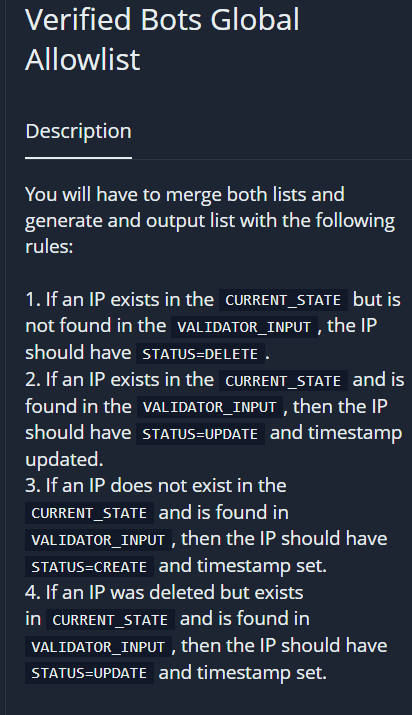
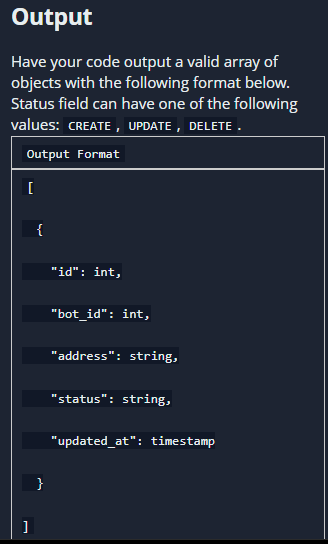

In [ ]:
VALIDATOR_INPUT = '''"bot_id","address"
133,"20.191.45.212/32"
133,"50.16.241.114/32"
133,"23.21.227.69/32"
133,"50.16.241.117/32"
133,"40.88.21.235/32"
133,"50.16.241.113/32"
133,"52.204.97.54/32"
133,"50.16.247.234/32"
133,"54.208.102.37/32"
133,"52.5.190.21/32"
133,"54.197.234.188/32"
133,"107.21.1.3/32"
133,"54.208.100.253/32"
52,"123.125.71.109/32"
52,"116.179.37.247/32"
52,"220.181.108.102/32"
52,"116.179.32.119/32"
52,"116.179.32.46/32"
52,"116.179.37.9/32"
52,"180.76.15.139/32"
52,"111.206.221.106/32"
52,"220.181.108.107/32"
52,"111.206.198.52/32"
52,"116.179.37.198/32"
52,"116.179.37.239/32"
52,"180.76.15.135/32"
52,"116.179.37.22/32"
52,"111.206.198.75/32"
52,"116.179.37.47/32"
52,"123.125.71.21/32"
52,"180.76.15.136/32"
52,"111.206.221.11/32"
52,"116.179.37.252/32"
52,"116.179.37.8/32"
52,"116.179.32.90/32"
52,"116.179.32.75/32"
52,"111.206.221.4/32"
52,"116.179.32.97/32"
52,"123.125.71.85/32"
52,"111.206.198.15/32"
52,"116.179.37.123/32"
52,"111.206.221.68/32"
52,"116.179.32.239/32"
52,"180.76.15.34/32"
52,"123.125.71.18/32"
52,"116.179.32.223/32"
52,"116.179.37.134/32"
52,"116.179.37.86/32"
52,"111.206.221.20/32"
52,"220.181.108.111/32"
52,"220.181.108.123/32"
52,"220.181.108.155/32"
52,"180.76.15.150/32"
52,"116.179.37.158/32"
52,"116.179.32.199/32"
52,"116.179.37.112/32"
52,"116.179.32.146/32"
52,"180.76.15.151/32"
52,"116.179.32.234/32"
52,"116.179.32.215/32"
52,"111.206.221.34/32"
52,"116.179.37.67/32"
52,"180.76.15.25/32"
52,"220.181.108.171/32"
52,"116.179.37.81/32"
52,"180.76.15.23/32"
52,"116.179.37.31/32"
52,"116.179.32.87/32"
52,"180.76.15.137/32"
52,"123.125.71.43/32"
52,"116.179.37.217/32"
52,"180.76.15.152/32"
52,"116.179.32.133/32"
52,"116.179.32.221/32"
52,"220.181.108.143/32"
52,"116.179.37.171/32"
52,"111.206.198.126/32"
52,"116.179.37.78/32"
52,"180.76.15.143/32"
52,"123.125.71.98/32"
52,"123.125.71.94/32"
52,"123.125.71.70/32"
52,"116.179.37.150/32"
52,"123.125.71.20/32"
52,"180.76.15.158/32"
52,"111.206.221.76/32"
52,"111.206.221.114/32"
52,"116.179.37.0/32"
52,"116.179.32.157/32"
52,"220.181.108.116/32"
52,"220.181.108.163/32"
52,"116.179.37.114/32"
52,"180.76.15.6/32"
52,"116.179.32.54/32"
52,"116.179.32.211/32"
52,"111.206.198.6/32"
52,"116.179.37.93/32"
52,"116.179.32.95/32"
52,"116.179.37.136/32"
52,"111.206.221.72/32"
52,"111.206.221.79/32"
52,"111.206.221.18/32"
52,"116.179.32.17/32"
52,"111.206.198.94/32"
52,"111.206.221.10/32"
52,"116.179.37.91/32"
52,"116.179.32.207/32"
52,"180.76.15.134/32"
52,"123.125.71.81/32"
52,"111.206.198.53/32"
52,"116.179.32.101/32"
52,"123.125.71.105/32"
52,"116.179.32.248/32"
'''

CURRENT_STATE='''"id","bot_id","address","created_at","updated_at","deleted_at"
272747,133,"20.191.45.212/32","2021-05-03 19:38:32.502171+00","2021-09-15 15:55:45.463072+00",
29172,133,"50.16.241.114/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463074+00",
29177,133,"23.21.227.69/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463073+00",
29178,133,"50.16.241.117/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463075+00",
148244,133,"40.88.21.235/32","2020-04-16 23:52:27.942766+00","2021-09-15 15:55:45.463073+00",
29171,133,"50.16.241.113/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463074+00",
29174,133,"52.204.97.54/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463076+00",
29173,133,"50.16.247.234/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463075+00",
84993,133,"54.208.102.37/32","2019-11-15 22:50:49.517137+00","2021-09-15 15:55:45.463077+00",
29175,133,"52.5.190.19/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463076+00",
29176,133,"54.197.234.188/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463077+00",
84994,133,"107.21.1.8/32","2019-11-15 22:50:49.517137+00","2021-09-15 15:55:45.463078+00",
29179,133,"54.208.100.253/32","2019-08-27 22:38:08.081476+00","2021-09-15 15:55:45.463077+00",
6368,52,"123.125.71.109/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:50.125878+00",
263728,52,"116.179.37.247/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:00:12.605532+00",
6466,52,"220.181.108.102/32","2019-08-14 21:37:35.58665+00","2021-09-16 03:59:31.217762+00",
149950,52,"116.179.32.119/32","2020-05-07 18:04:21.301992+00","2021-09-16 04:01:48.370977+00",
145427,52,"116.179.32.46/32","2020-03-27 06:42:12.812022+00","2021-09-16 04:00:52.15177+00",
263741,52,"116.179.37.9/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:01:22.703607+00",
6232,52,"180.76.15.139/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:06.410831+00",
6320,52,"111.206.221.106/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:26.176573+00",
6513,52,"220.181.108.107/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:55.96909+00",
54178,52,"111.206.198.52/32","2019-09-25 14:40:32.265589+00","2021-09-16 16:07:25.277752+00",
263773,52,"116.179.37.198/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:01:05.658682+00",
263769,52,"116.179.37.239/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:32.266215+00",
6212,52,"180.76.15.135/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:03.803624+00",
263737,52,"116.179.37.22/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:30.588774+00",
54126,52,"111.206.198.75/32","2019-09-25 13:34:24.457667+00","2021-09-16 04:00:49.472435+00",
263636,52,"116.179.37.47/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:01:27.14194+00",
6452,52,"123.125.71.21/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:45.174752+00",
6312,52,"180.76.15.136/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:22.64847+00",
6408,52,"111.206.221.11/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:44.795285+00",
263595,52,"116.179.37.252/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:45.80357+00",
263649,52,"116.179.37.8/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:01:43.899177+00",
144908,52,"116.179.32.90/32","2020-03-26 10:33:13.76704+00","2021-09-16 16:07:52.028348+00",
144906,52,"116.179.32.75/32","2020-03-26 10:33:13.76704+00","2021-09-16 04:00:04.271396+00",
6464,52,"111.206.221.4/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:58.080085+00",
145010,52,"116.179.32.97/32","2020-03-27 00:28:12.7104+00","2021-09-16 16:07:23.425877+00",
6519,52,"123.125.71.85/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:48.682838+00",
53546,52,"111.206.198.15/32","2019-09-25 03:45:11.687293+00","2021-09-16 04:01:29.982874+00",
263758,52,"116.179.37.123/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:15.479248+00",
6418,52,"111.206.221.68/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:18.58223+00",
145458,52,"116.179.32.239/32","2020-03-27 06:42:12.812022+00","2021-09-16 04:01:22.281878+00",
6486,52,"180.76.15.34/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:48.147919+00",
6208,52,"123.125.71.18/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:28.845323+00",
145002,52,"116.179.32.223/32","2020-03-26 22:29:15.978035+00","2021-09-16 03:59:25.783465+00",
263608,52,"116.179.37.134/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:11.762382+00",
263625,52,"116.179.37.86/32","2021-04-08 23:59:17.495196+00","2021-09-16 03:59:48.028962+00",
6224,52,"111.206.221.20/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:52.971673+00",
6225,52,"220.181.108.111/32","2019-08-14 21:37:35.58665+00","2021-09-16 03:59:42.573845+00",
6275,52,"220.181.108.123/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:09.394586+00",
6370,52,"220.181.108.155/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:39.429889+00",
6510,52,"180.76.15.150/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:26.655642+00",
263730,52,"116.179.37.158/32","2021-04-08 23:59:17.495196+00","2021-09-16 03:59:38.194006+00",
145466,52,"116.179.32.199/32","2020-03-27 06:42:12.812022+00","2021-09-16 03:59:22.008073+00",
263709,52,"116.179.37.112/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:06:58.503122+00",
145447,52,"116.179.32.146/32","2020-03-27 06:42:12.812022+00","2021-09-16 04:00:59.091437+00",
6503,52,"180.76.15.151/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:20.175004+00",
145442,52,"116.179.32.234/32","2020-03-27 06:42:12.812022+00","2021-09-16 03:59:58.88984+00",
145478,52,"116.179.32.215/32","2020-03-27 07:42:03.399819+00","2021-09-16 16:08:09.509629+00",
6509,52,"111.206.221.34/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:01.269051+00",
265658,52,"116.179.37.67/32","2021-04-22 14:51:47.09902+00","2021-09-16 03:59:45.225599+00",
6207,52,"180.76.15.25/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:26.968182+00",
6204,52,"220.181.108.171/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:41.465058+00",
263594,52,"116.179.37.81/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:00:02.298895+00",
6335,52,"180.76.15.23/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:20.557141+00",
263764,52,"116.179.37.31/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:59.226497+00",
144864,52,"116.179.32.87/32","2020-03-26 07:33:32.952016+00","2021-09-16 03:59:42.947418+00",
6345,52,"180.76.15.137/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:16.993934+00",
6435,52,"123.125.71.43/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:45.549721+00",
263611,52,"116.179.37.217/32","2021-04-08 23:59:17.495196+00","2021-09-16 04:00:54.19841+00",
6379,52,"180.76.15.152/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:00.569123+00",
144959,52,"116.179.32.133/32","2020-03-26 13:39:29.565388+00","2021-09-16 03:59:25.425973+00",
145468,52,"116.179.32.221/32","2020-03-27 07:42:03.399819+00","2021-09-16 16:07:51.530294+00",
6322,52,"220.181.108.143/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:50.934749+00",
263613,52,"116.179.37.171/32","2021-04-08 23:59:17.495196+00","2021-09-16 03:59:22.87487+00",
53553,52,"111.206.198.126/32","2019-09-25 03:45:11.687293+00","2021-09-16 16:07:01.094277+00",
263719,52,"116.179.37.78/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:07:04.299829+00",
6511,52,"180.76.15.143/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:13.145761+00",
6244,52,"123.125.71.98/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:42.522799+00",
6294,52,"123.125.71.94/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:13.136953+00",
6369,52,"123.125.71.70/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:11.295961+00",
263654,52,"116.179.37.150/32","2021-04-08 23:59:17.495196+00","2021-09-16 03:59:07.969996+00",
6386,52,"123.125.71.20/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:33.207907+00",
6211,52,"180.76.15.158/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:50.071321+00",
6364,52,"111.206.221.76/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:00.313004+00",
6344,52,"111.206.221.114/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:49.759128+00",
265278,52,"116.179.37.0/32","2021-04-16 07:48:59.138824+00","2021-09-16 03:59:29.045004+00",
144911,52,"116.179.32.157/32","2020-03-26 10:33:13.76704+00","2021-09-16 16:07:50.395357+00",
6349,52,"220.181.108.116/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:48.430078+00",
6524,52,"220.181.108.163/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:43.435179+00",
263694,52,"116.179.37.114/32","2021-04-08 23:59:17.495196+00","2021-09-16 16:06:58.395376+00",
6387,52,"180.76.15.6/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:42.525668+00",
164478,52,"116.179.32.54/32","2020-06-22 10:06:15.226705+00","2021-09-16 04:00:57.114927+00",
145473,52,"116.179.32.211/32","2020-03-27 07:42:03.399819+00","2021-09-16 03:59:01.134972+00",
54167,52,"111.206.198.6/32","2019-09-25 14:40:32.265589+00","2021-09-16 16:07:28.814143+00",
265657,52,"116.179.37.93/32","2021-04-22 14:51:47.09902+00","2021-09-16 04:00:19.222927+00",
145482,52,"116.179.32.95/32","2020-03-27 07:42:03.399819+00","2021-09-16 04:00:16.840489+00",
263766,52,"116.179.37.136/32","2021-04-08 23:59:17.495196+00","2021-09-16 03:59:01.695391+00",
6376,52,"111.206.221.72/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:22.409219+00",
6268,52,"111.206.221.79/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:52.437359+00",
6410,52,"111.206.221.18/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:00:32.273602+00",
144916,52,"116.179.32.17/32","2020-03-26 10:33:13.76704+00","2021-09-16 04:01:02.973099+00",
54181,52,"111.206.198.94/32","2019-09-25 14:40:32.265589+00","2021-09-16 04:01:14.825956+00",
6424,52,"111.206.221.10/32","2019-08-14 21:37:35.58665+00","2021-09-16 16:07:01.340941+00",
265645,52,"116.179.37.91/32","2021-04-22 14:51:47.09902+00","2021-09-16 03:59:25.666062+00",
144940,52,"116.179.32.207/32","2020-03-26 12:40:15.486431+00","2021-09-16 04:01:32.143586+00",
6270,52,"180.76.15.134/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:21.802264+00",
6241,52,"123.125.71.81/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:19.738146+00",
54184,52,"111.206.198.53/32","2019-09-25 14:40:32.265589+00","2021-09-16 04:01:25.028758+00",
145464,52,"116.179.32.101/32","2020-03-27 06:42:12.812022+00","2021-09-16 16:07:22.182629+00",
6396,52,"123.125.71.105/32","2019-08-14 21:37:35.58665+00","2021-09-16 04:01:26.269268+00",
149957,52,"116.179.32.248/32","2020-05-07 18:04:21.301992+00","2021-09-16 04:01:14.850149+00",
'''

## My 1st Solution

In [ ]:
%%timeit

import datetime

validator_bot_ids, validator_addresses = [], []
for r in VALIDATOR_INPUT.strip().split("\n")[1:]:
    bot_id, address = r.split(",")
    validator_bot_ids.append(int(bot_id))
    validator_addresses.append(address.strip())
    
current_bot_ids, current_addresses = [], []
for r in CURRENT_STATE.strip().split("\n")[1:]:
    _, bot_id, address, _, _, _ = r.split(",")
    current_bot_ids.append(int(bot_id))
    current_addresses.append(address.strip())    



all_addresses = set(current_addresses) | set(validator_addresses)
output = []

for i, a in enumerate(all_addresses, 1):
    if a in current_addresses and a not in validator_addresses:
        status = "DELETE"
        bot_id = current_bot_ids[current_addresses.index(a)]
    elif a in current_addresses and a in validator_addresses:
        status = "UPDATE"
        bot_id = current_bot_ids[current_addresses.index(a)]
    elif a not in current_addresses and a in validator_addresses: 
        status = "CREATE"
        bot_id = validator_bot_ids[validator_addresses.index(a)]
    
    
    output.append(dict(
        id=i,
        bot_id=bot_id,
        address=a,
        status=status,
        updated_at=str(datetime.datetime.now())
    ))

1.02 ms ± 13.7 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


## 2nd Solution

In [ ]:
%%timeit

import datetime

validator_bot_ids, validator_addresses = [], []
for row in VALIDATOR_INPUT.strip().split("\n")[1:]:
    bot_id, address = row.split(",")
    validator_bot_ids.append(int(bot_id))
    validator_addresses.append(address.strip())

output = []
current_addresses = []
max_id = -1

for row in CURRENT_STATE.strip().split("\n")[1:]:
    id_, bot_id, address, _, _, deleted_at = row.split(",")
    address = address.strip()
    id_ = int(id_)

    if id_ > max_id:
        max_id = id_

    output.append(
        dict(
            id=id_, 
            bot_id=int(bot_id), 
            address=address,
            status="UPDATED" if address in validator_addresses else "DELETED",
            updated_at=str(datetime.datetime.now()) if address in validator_addresses else deleted_at,
        )
    )

    current_addresses.append(address)

current_addresses = set(current_addresses)

for bot_id, address in zip(validator_bot_ids, validator_addresses):
    max_id += 1
    output.append(
        dict(
            id=max_id, 
            bot_id=bot_id, 
            address=address,
            status="UPDATED" if address in current_addresses else "CREATED",
            updated_at=str(datetime.datetime.now()),
        )
    )

    # current_bot_ids.append(int(bot_id))
    # current_addresses.append(address.strip())    

989 µs ± 32.8 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


In [ ]:
# %%timeit

import pandas as pd
from io import StringIO
import numpy as np

df_current = (
    pd.read_csv(StringIO(CURRENT_STATE), parse_dates=["created_at", "updated_at", "deleted_at"])
    .assign(address=lambda df: df.address.str.strip())
)
# df_current.info()
max_id = df_current.id.max()

current_ts = pd.Timestamp.now()

df_validator = (
    pd.read_csv(StringIO(VALIDATOR_INPUT))
    .assign(address=lambda df: df.address.str.strip())
    .assign(created_at=lambda df: np.where(df.address.isin(df_current.address), current_ts, np.nan))
    # .reindex(columns=df_current.dtypes.to_dict())
)

df_validator.loc[lambda df: df.created_at.notna(), "id"] = range(max_id + 1, max_id + df_validator.created_at.notna().sum() + 1)

# df_validator.info()

# deleted
df_current.loc[lambda df: ~df.address.isin(df_validator.address) & ~df.bot_id.isin(df_validator.bot_id), "deleted_at"] = current_ts
# updated
df_current.loc[lambda df: df.address.isin(df_validator.address) & df.bot_id.isin(df_validator.bot_id), ["updated_at", "deleted_at"]] = current_ts, np.nan
# created
df_current = pd.concat([df_current, df_validator.loc[lambda df: df.created_at.notna()]])

df_current.to_dict("records")
df_current.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 224 entries, 0 to 112
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          224 non-null    float64       
 1   bot_id      224 non-null    int64         
 2   address     224 non-null    object        
 3   created_at  224 non-null    object        
 4   updated_at  113 non-null    object        
 5   deleted_at  0 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(3)
memory usage: 12.2+ KB


In [ ]:
# df_current = (
#     pd.read_csv(StringIO(CURRENT_STATE), parse_dates=["created_at", "updated_at", "deleted_at"])
#     .assign(address=lambda df: df.address.str.strip())
# )

# df_validator = (
#     pd.read_csv(StringIO(VALIDATOR_INPUT))
#     .assign(address=lambda df: df.address.str.strip())
#     .assign(created_at=lambda df: np.where(df.address.isin(df_current.address), current_ts, np.nan))
#     # .reindex(columns=df_current.dtypes.to_dict())
# )



# for k, v in df_current.dtypes.to_dict().items():
#     print(k, type(v))
#     if k in df_validator.columns and not isinstance(df_validator[k], type(v)):
#         df_validator[k] = df_validator[k].astype(v)
#     else:
#         df_validator[k] = pd.Series([], dtype=v)

# df_validator = df_validator[df_current.columns]

# print(df_current.dtypes)
# print(df_validator.dtypes)
# df_validator.dtypes.equals(df_current.dtypes)

id <class 'numpy.dtype[int64]'>
bot_id <class 'numpy.dtype[int64]'>
address <class 'numpy.dtype[object_]'>
created_at <class 'pandas.core.dtypes.dtypes.DatetimeTZDtype'>
updated_at <class 'pandas.core.dtypes.dtypes.DatetimeTZDtype'>
deleted_at <class 'numpy.dtype[datetime64]'>
id                          int64
bot_id                      int64
address                    object
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
deleted_at         datetime64[ns]
dtype: object
id                        float64
bot_id                      int64
address                    object
created_at    datetime64[ns, UTC]
updated_at    datetime64[ns, UTC]
deleted_at         datetime64[ns]
dtype: object


/tmp/ipykernel_44896/512822334.py:18: FutureWarning: Using .astype to convert from timezone-naive dtype to timezone-aware dtype is deprecated and will raise in a future version.  Use ser.dt.tz_localize instead.
  df_validator[k] = df_validator[k].astype(v)


False